In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip

In [71]:
device = torch.device("cuda" if torch.cuda.is_available() else
                      "mps" if torch.backends.mps.is_available() else
                      "cpu")
print(f"Using device: {device}")

Using device: mps


# Load Dataset & Dataloader

In [1]:
img_folder = "./val2017/"
ann_file = "./annotations/instances_val2017.json"

In [47]:
import coco_loader
import transforms
from torch.utils.data import DataLoader

coco_val_dataset = coco_loader.get_coco("./", "val", transforms.preprocessing())

coco_val_dataloader = DataLoader(coco_val_dataset, batch_size=1, collate_fn=coco_loader.collate_fn)

loading annotations into memory...
Done (t=0.23s)
creating index...
index created!


# Load SSD Model

In [3]:
import torch
import model

In [4]:
model = model.SSD()

In [5]:
pretrained_weights_path = "./detection_weights.pth"

try:
    state_dict = torch.load(pretrained_weights_path)
    model.load_state_dict(state_dict)
    print("Pretrained weights loaded successfully.")
except FileNotFoundError:
    print("Pretrained weights file not found. Using random initialization.")
except Exception as e:
    print(f"Error loading pretrained weights: {e}")

model.to(device)
model.eval()

/var/folders/1q/rxjynltx6gd_27l52x3hgms40000gn/T/ipykernel_91039/402868697.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(pretrained_weights_pat

Pretrained weights loaded successfully.
Using device: mps


SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [6]:
dummy_input = [torch.rand(3, 300, 300).to(device)]

output = model(dummy_input)
print(output)

[{'boxes': tensor([[ 66.7423,   2.4333, 254.4296, 179.7254],
        [ 29.0987,   8.3231, 121.0340, 145.6343],
        [ 68.4127,   1.9898, 224.2879,  88.9117],
        [101.4719,  38.6244, 215.8796, 271.5144],
        [ 77.0356,   7.6081, 148.2795, 157.0774],
        [ 10.0958,   1.8035, 154.1074,  92.0238],
        [  1.9470,   2.5276, 297.9933, 291.7701],
        [100.7676,  11.1990, 187.6620, 146.3891],
        [  0.9750,  24.8637,  93.3101, 285.1259],
        [  4.7343,   5.3064,  85.5404, 164.9816],
        [ 45.1872,  32.2139, 176.8828, 176.8904],
        [170.5552,   3.9978, 245.7159, 157.2764],
        [124.9561,  19.8686, 232.2591, 131.7829],
        [ 27.1778,  24.7875, 148.5425, 284.9632],
        [ 84.4237,  19.1376, 157.4299,  93.5421],
        [140.0864,  28.6276, 210.2670, 191.9264],
        [140.7885,   0.7260, 289.1700,  91.1463],
        [ 44.1579,  60.1773, 113.5528, 222.5150],
        [163.0043,  33.3721, 292.5776, 279.4531],
        [113.3206,   4.2678, 192.4581, 

# Evaluation

In [48]:
import coco_eval

coco_evaluator = coco_eval.CocoEvaluator(coco_val_dataloader)

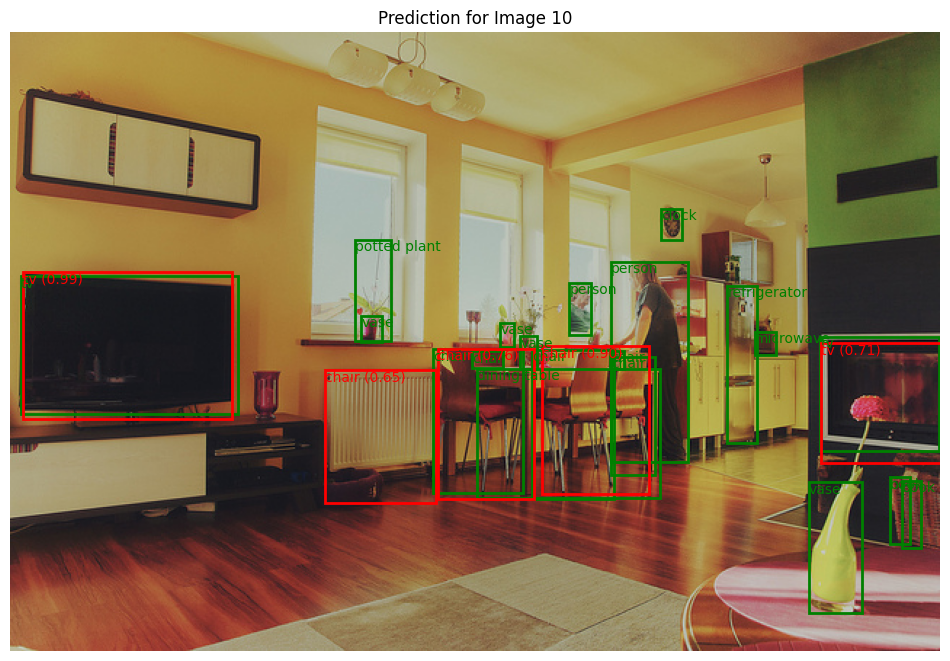

Accumulating evaluation results...
DONE (t=0.02s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.392
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.136
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.057
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.369
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.117
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.211
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.211
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.057
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.417
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= la

In [106]:
from torch.utils.tensorboard import SummaryWriter
import torch
import json

with open("classes.json", "r") as f:
    class_map = json.load(f)

writer = SummaryWriter(log_dir="runs/coco_eval")

for _, (images, targets) in zip(range(1), coco_val_dataloader):
#for images, targets in coco_val_dataloader:

    images = [img.to(device) for img in images]

    targets = [
        {k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in t.items()}
        for t in targets
    ]

    with torch.no_grad():
        outputs = model(images)

    predictions = {
        target["image_id"]: {
            "boxes": output["boxes"].to(device),
            "scores": output["scores"].to(device),
            "labels": output["labels"].to(device),
        }
        for target, output in zip(targets, outputs)
    }

    # visualize_predictions(images, targets, outputs, step, class_map)
    
    coco_evaluator.update(predictions)

coco_evaluator.accumulate()
coco_evaluator.summarize()

for iou_type, coco_eval in coco_evaluator.coco_eval.items():
    print(f"IoU metric: {iou_type}")

    mAP = coco_eval.stats[0]

    writer.add_scalar(f'{iou_type}/mAP', mAP)
    precision = coco_eval.stats[1]
    recall = coco_eval.stats[2]
    
    writer.add_scalar(f'{iou_type}/Precision', precision)
    writer.add_scalar(f'{iou_type}/Recall', recall)

writer.close()


In [104]:
# Updated visualization function to show class labels
def visualize_predictions(images, targets, outputs, step, class_map):
    # Iterate over each image in the batch
    for img, target, output in zip(images, targets, outputs):
        # Create a new figure
        fig, ax = plt.subplots(1, figsize=(12, 12))

        # Convert tensor to numpy for visualization
        img = img.permute(1, 2, 0).cpu().numpy()  # Convert from CxHxW to HxWxC
        ax.imshow(img)

        # Plot ground truth bounding boxes and labels
        for box, label in zip(target['boxes'], target['labels']):
            xmin, ymin, xmax, ymax = box.cpu().numpy()
            label_name = class_map[str(label.item())]  # Get label name from class_map
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor='g', facecolor='none')
            ax.add_patch(rect)
            ax.text(xmin, ymin, label_name, color='g', fontsize=10, verticalalignment='top')

        # Plot predicted bounding boxes and labels
        for box, score, label in zip(output['boxes'], output['scores'], output['labels']):
            if score > 0.5:  # Only show boxes with high confidence
                xmin, ymin, xmax, ymax = box.cpu().numpy()
                label_name = class_map[str(label.item())]  # Get label name from class_map
                rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                     linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
                ax.text(xmin, ymin, f"{label_name} ({score:.2f})", color='r', fontsize=10, verticalalignment='top')

        plt.axis('off')
        plt.title(f"Prediction for Image {step + 1}")
        plt.show()